In [1]:
import uproot
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import h5py
import timeit
import copy
import torch

plt.style.use('niceplots')

In [181]:
# read input hdf5

# inputfile2 = '/nfs/dust/belle2/user/ferber/github-ECLML/test/inference-summary.hdf5'
inputfile2 = '/nfs/dust/belle2/user/ferber/eclml-monitoring/20210317-194834-04164/inference-summary.hdf5'
inputfile1 = '/nfs/dust/belle2/user/ferber/eclml-monitoring/20210321-074315-40870/inference-summary.hdf5'

h5f = h5py.File(inputfile1,'r')
p_sum_1 = h5f['p_sum'][:]
t_sum_1 = h5f['t_sum'][:]
r_sum_1 = h5f['r_sum'][:]
mon_E0_1 = h5f['mon_E0'][:]
mon_E1_1 = h5f['mon_E1'][:]
mon_theta0_1 = h5f['mon_theta0'][:]
mon_theta1_1 = h5f['mon_theta1'][:]
mon_angle_1 = h5f['mon_angle'][:]
mon_nshared_1 = h5f['mon_nshared'][:]
mon_e0_overlap_1 = h5f['mon_e0_overlap'][:]
mon_e1_overlap_1 = h5f['mon_e1_overlap'][:]
swap_1 = h5f['swap'][:]
h5f.close()

h5f = h5py.File(inputfile2,'r')
p_sum_2 = h5f['p_sum'][:]
t_sum_2 = h5f['t_sum'][:]
r_sum_2 = h5f['r_sum'][:]
mon_E0_2 = h5f['mon_E0'][:]
mon_E1_2 = h5f['mon_E1'][:]
mon_theta0_2 = h5f['mon_theta0'][:]
mon_theta1_2 = h5f['mon_theta1'][:]
mon_angle_2 = h5f['mon_angle'][:]
mon_nshared_2 = h5f['mon_nshared'][:]
swap_2 = h5f['swap'][:]
h5f.close()


In [182]:
len(swap_1[swap_1>0])/len(swap_1)

0.015546552459974638

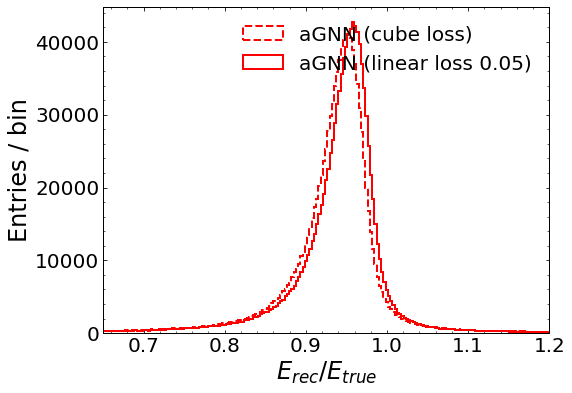

In [185]:
t_1 = t_sum_1[:,0]#[mon_E0_1>0.75]
p_1 = p_sum_1[:,0]#[mon_E0>0.75]
r_1 = r_sum_1[:,0]#[mon_E0>0.75]
t_2 = t_sum_2[:,0]#[mon_E0_1>0.75]
p_2 = p_sum_2[:,0]#[mon_E0>0.75]
r_2 = r_sum_2[:,0]#[mon_E0>0.75]

xrange=[0.65, 1.2]
bins=np.linspace(xrange[0], xrange[1], 200)
_=plt.hist(p_2/mon_E0_2, bins=bins, histtype='step', linewidth=2, ls='--', edgecolor='red', label='aGNN (cube loss)')
_=plt.hist(p_1/mon_E0_1, bins=bins, histtype='step', linewidth=2, edgecolor='red', label='aGNN (linear loss 0.05)')
plt.gca().set_xlabel(r'$E_{rec}/E_{true}$')
plt.gca().set_ylabel(r'Entries / bin')
plt.legend()
_=plt.gca().set_xlim(xrange)
plt.savefig(f'plot_erec_etrue_cube.pdf', bbox_inches='tight')
# plt.close()

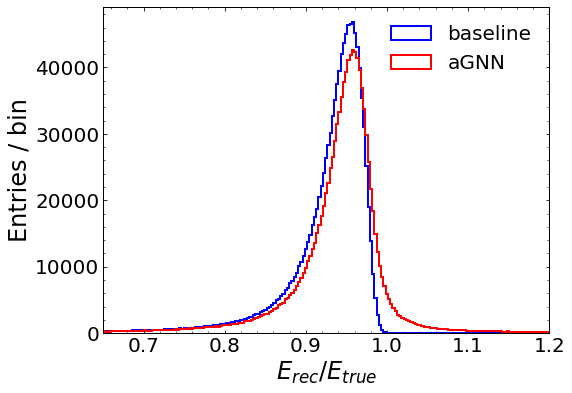

In [177]:
t_1 = t_sum_1[:,0]#[mon_E0_1>0.75]
p_1 = p_sum_1[:,0]#[mon_E0>0.75]
r_1 = r_sum_1[:,0]#[mon_E0>0.75]

xrange=[0.65, 1.2]
bins=np.linspace(xrange[0], xrange[1], 200)
_=plt.hist(r_1/mon_E0_1, bins=bins, histtype='step', linewidth=2, edgecolor='blue', label='baseline')
_=plt.hist(p_1/mon_E0_1, bins=bins, histtype='step', linewidth=2, edgecolor='red', label='aGNN')
plt.gca().set_xlabel(r'$E_{rec}/E_{true}$')
plt.gca().set_ylabel(r'Entries / bin')
plt.legend()
_=plt.gca().set_xlim(xrange)
plt.savefig(f'plot_erec_etrue.pdf', bbox_inches='tight')
# plt.close()

In [160]:
t_1 = t_sum_1[:,0]#[mon_E0_1>0.75]
p_1 = p_sum_1[:,0]#[mon_E0>0.75]
r_1 = r_sum_1[:,0]#[mon_E0>0.75]

xrange=[0.85, 1.15]
bins=np.linspace(xrange[0], xrange[1], 200)
_=plt.hist(r_1/t_1, bins=bins, histtype='step', linewidth=2, edgecolor='blue', label='baseline')
_=plt.hist(p_1/t_1, bins=bins, histtype='step', linewidth=2, edgecolor='red', label='aGNN')
plt.gca().set_xlabel(r'$E_{rec}/E_{dep}$')
plt.gca().set_ylabel(r'Entries / bin')
plt.legend()
_=plt.gca().set_xlim(xrange)
plt.savefig(f'plot_erec_edep.pdf', bbox_inches='tight')
plt.close()

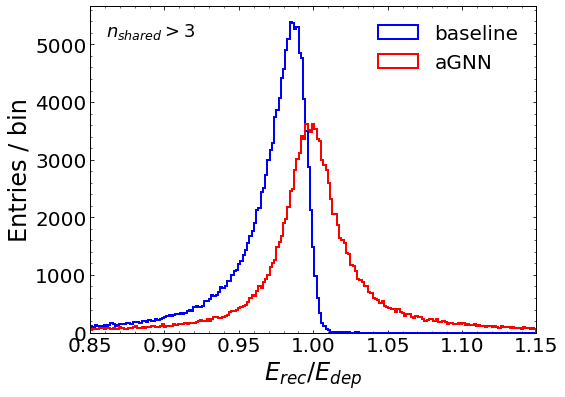

In [166]:
p_1 = p_sum_1[:,0][(mon_nshared_1>3)]
r_1 = r_sum_1[:,0][(mon_nshared_1>3)]
t_1 = t_sum_1[:,0][(mon_nshared_1>3)]

xrange=[0.85, 1.15]
bins=np.linspace(xrange[0], xrange[1], 200)
_=plt.hist(r_1/t_1, bins=bins, histtype='step', linewidth=2, edgecolor='blue', label='baseline')
_=plt.hist(p_1/t_1, bins=bins, histtype='step', linewidth=2, edgecolor='red', label='aGNN')
plt.gca().set_xlabel(r'$E_{rec}/E_{dep}$')
plt.gca().set_ylabel(r'Entries / bin')
plt.legend()
_=plt.gca().set_xlim(xrange)
plt.text(0.035, 0.925, '$n_{shared} > 3$', size=18, horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes)
plt.savefig(f'plot_erec_dep_n3.pdf', bbox_inches='tight')
# plt.close()

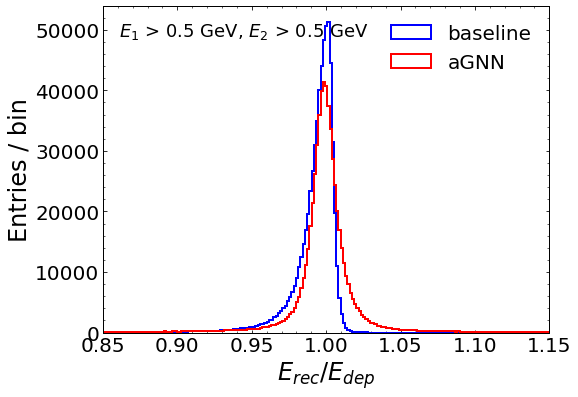

In [164]:
# t_1 = t_sum_1[:,0][mon_E0_1>0.75]
p_1 = p_sum_1[:,0][(mon_E0_1>0.5) & (mon_E0_2>0.5)]
r_1 = r_sum_1[:,0][(mon_E0_1>0.5) & (mon_E0_2>0.5)]
t_1 = t_sum_1[:,0][(mon_E0_1>0.5) & (mon_E0_2>0.5)]

xrange=[0.85, 1.15]
bins=np.linspace(xrange[0], xrange[1], 200)
_=plt.hist(r_1/t_1, bins=bins, histtype='step', linewidth=2, edgecolor='blue', label='baseline')
_=plt.hist(p_1/t_1, bins=bins, histtype='step', linewidth=2, edgecolor='red', label='aGNN')
plt.gca().set_xlabel(r'$E_{rec}/E_{dep}$')
plt.gca().set_ylabel(r'Entries / bin')
plt.legend()
_=plt.gca().set_xlim(xrange)
plt.text(0.035, 0.925, '$E_1$ > 0.5 GeV, $E_2$ > 0.5 GeV', size=18, horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes)
plt.savefig(f'plot_erec_dep_500MeV.pdf', bbox_inches='tight')
# plt.close()

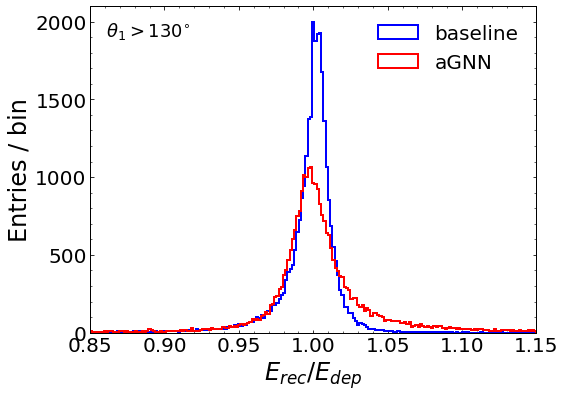

In [174]:
p_1 = p_sum_1[:,0][(mon_theta0_1>np.radians(130))]
r_1 = r_sum_1[:,0][(mon_theta0_1>np.radians(130))]
t_1 = t_sum_1[:,0][(mon_theta0_1>np.radians(130))]

xrange=[0.85, 1.15]
bins=np.linspace(xrange[0], xrange[1], 200)
_=plt.hist(r_1/t_1, bins=bins, histtype='step', linewidth=2, edgecolor='blue', label='baseline')
_=plt.hist(p_1/t_1, bins=bins, histtype='step', linewidth=2, edgecolor='red', label='aGNN')
plt.gca().set_xlabel(r'$E_{rec}/E_{dep}$')
plt.gca().set_ylabel(r'Entries / bin')
plt.legend()
_=plt.gca().set_xlim(xrange)
plt.text(0.035, 0.925, r'$\theta_1 > 130^{\circ}$', size=18, horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes)
plt.savefig(f'plot_erec_dep_bwd.pdf', bbox_inches='tight')
# plt.close()

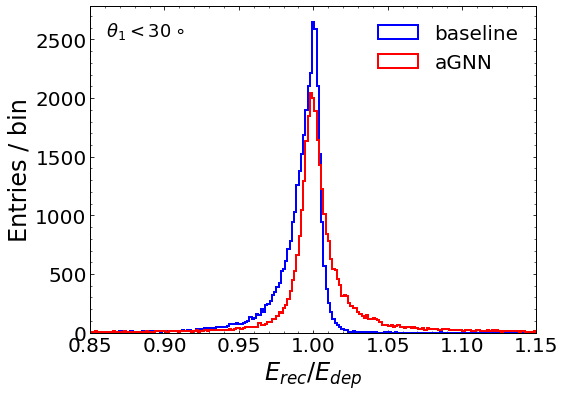

In [173]:
p_1 = p_sum_1[:,0][(mon_theta0_1<np.radians(30))]
r_1 = r_sum_1[:,0][(mon_theta0_1<np.radians(30))]
t_1 = t_sum_1[:,0][(mon_theta0_1<np.radians(30))]

xrange=[0.85, 1.15]
bins=np.linspace(xrange[0], xrange[1], 200)
_=plt.hist(r_1/t_1, bins=bins, histtype='step', linewidth=2, edgecolor='blue', label='baseline')
_=plt.hist(p_1/t_1, bins=bins, histtype='step', linewidth=2, edgecolor='red', label='aGNN')
plt.gca().set_xlabel(r'$E_{rec}/E_{dep}$')
plt.gca().set_ylabel(r'Entries / bin')
plt.legend()
_=plt.gca().set_xlim(xrange)
plt.text(0.035, 0.925, r'$\theta_1 < 30^{\circ}$', size=18, horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes)
plt.savefig(f'plot_erec_dep_fwd.pdf', bbox_inches='tight')
# plt.close()

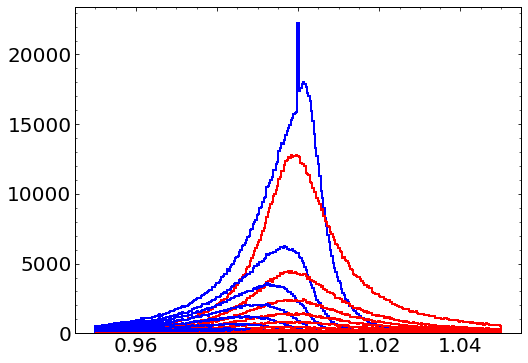

In [113]:
list_n = []
list_max_r = []
list_max_gnn = []

for nn in range(0,9):
    p_1 = p_sum_1[:,0][mon_nshared_1>=nn]
    r_1 = r_sum_1[:,0][mon_nshared_1>=nn]
    t_1 = t_sum_1[:,0][mon_nshared_1>=nn]

    
    xrange=[0.95, 1.05]
    bins=np.linspace(xrange[0], xrange[1], 300)
    n_r, bins_r, patches_r=plt.hist(r_1/t_1, bins=bins, histtype='step', linewidth=2, edgecolor='blue', label='baseline')
    n_gnn, bins_gnn, patches_gnn=plt.hist(p_1/t_1, bins=bins, histtype='step', linewidth=2, edgecolor='red', label='aGNN')
#     plt.gca().set_xlabel(r'$E_{rec}/E_{dep}$')
#     plt.gca().set_ylabel(r'Entries / bin')
#     plt.legend()
#     _=plt.gca().set_xlim(xrange)
#     _=plt.text(0.035, 0.925, r'$n_{shared} \geq 3$', size=18, horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes)
    elem_gnn = np.argmax(n_gnn)
    elem_r = np.argmax(n_r)
    max_gnn = (bins_gnn[elem_gnn]+bins_gnn[elem_gnn+1])/2.
    max_r = (bins_r[elem_r]+bins_r[elem_r+1])/2.
    list_n.append(nn)
    list_max_r.append(max_r)
    list_max_gnn.append(max_gnn)

    

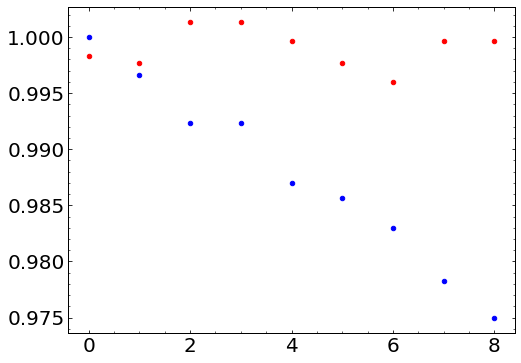

In [114]:
plt.scatter(list_n, list_max_r, s=20,c='b')
plt.scatter(list_n, list_max_gnn, s=20, c='r')

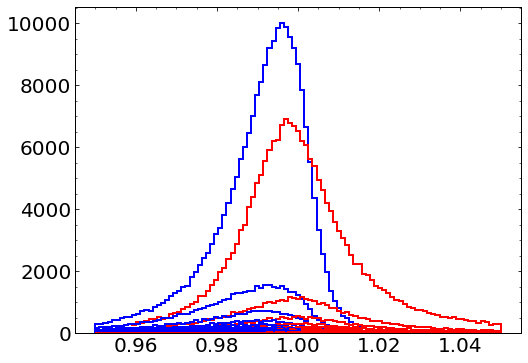

In [156]:
list_n = []
list_max_r = []
list_max_gnn = []

n=30
xx=np.linspace(0.002, 0.5, n)

for idx, nn in enumerate(xx):
    if idx >= n-1:
        break
    p_1 = p_sum_1[:,0][(mon_e0_overlap_1>xx[idx]) & (mon_e0_overlap_1<xx[idx+1])]# & mon_e0_overlap_1<bins[idx+1]]
    r_1 = r_sum_1[:,0][(mon_e0_overlap_1>xx[idx])& (mon_e0_overlap_1<xx[idx+1])]# & mon_e0_overlap_1<bins[idx+1]]
    t_1 = t_sum_1[:,0][(mon_e0_overlap_1>xx[idx])& (mon_e0_overlap_1<xx[idx+1])]# & mon_e0_overlap_1<bins[idx+1]]
    
    xrange=[0.95, 1.05]
    bins=np.linspace(xrange[0], xrange[1], 100)
    n_r, bins_r, patches_r=plt.hist(r_1/t_1, bins=bins, histtype='step', linewidth=2, edgecolor='blue', label='baseline')
    n_gnn, bins_gnn, patches_gnn=plt.hist(p_1/t_1, bins=bins, histtype='step', linewidth=2, edgecolor='red', label='aGNN')
#     plt.gca().set_xlabel(r'$E_{rec}/E_{dep}$')
#     plt.gca().set_ylabel(r'Entries / bin')
#     plt.legend()
#     _=plt.gca().set_xlim(xrange)
#     _=plt.text(0.035, 0.925, r'$n_{shared} \geq 3$', size=18, horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes)
    elem_gnn = np.argmax(n_gnn)
    elem_r = np.argmax(n_r)
    max_gnn = (bins_gnn[elem_gnn]+bins_gnn[elem_gnn+1])/2.
    max_r = (bins_r[elem_r]+bins_r[elem_r+1])/2.
    list_n.append(nn)
    list_max_r.append(max_r)
    list_max_gnn.append(max_gnn)

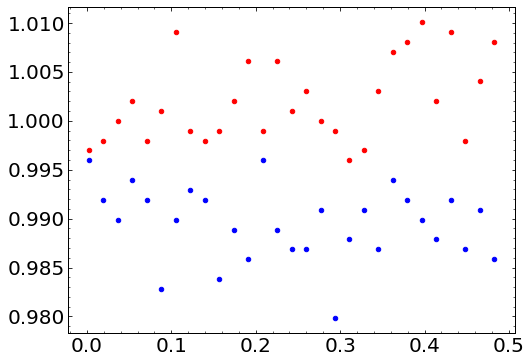

In [157]:
plt.scatter(list_n, list_max_r, s=20,c='b')
plt.scatter(list_n, list_max_gnn, s=20, c='r')

(array([9.91338e+05, 4.03990e+04, 2.01340e+04, 1.32840e+04, 1.00300e+04,
        8.21200e+03, 7.17700e+03, 6.18800e+03, 5.71400e+03, 5.28700e+03,
        5.08200e+03, 5.04800e+03, 4.74000e+03, 4.39600e+03, 3.97500e+03,
        3.59900e+03, 2.94100e+03, 2.14900e+03, 1.13800e+03, 2.58000e+02]),
 array([0.        , 0.0478235 , 0.09564699, 0.1434705 , 0.19129398,
        0.23911749, 0.286941  , 0.33476448, 0.38258797, 0.4304115 ,
        0.47823498, 0.5260585 , 0.573882  , 0.6217055 , 0.66952896,
        0.71735245, 0.76517594, 0.8129995 , 0.860823  , 0.90864646,
        0.95646995], dtype=float32),
 <BarContainer object of 20 artists>)

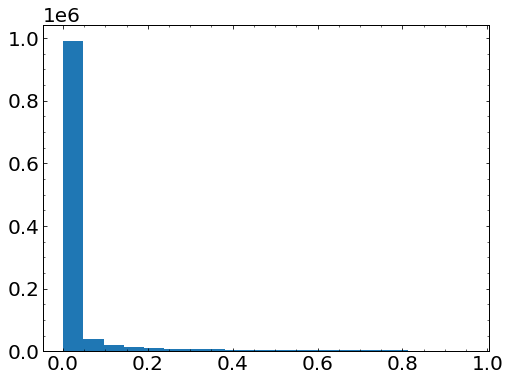

In [123]:
plt.hist(mon_e0_overlap_1, bins=20)